In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows',50)         #Never, set max rows to NONE, as it is computationally extensive
pd.set_option('display.max_columns',50)   

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,Verified,Jun-2010,Fully Paid,debt_consolidation,Toxic Debt Payoff,8.32,Sep-1998,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


In [4]:
df.shape

(396030, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
for i in df.loan_status.unique():
    print('total number: ',   len(df[df['loan_status'].eq(i)]))
    print('total percentage: ',len(df[df['loan_status'].eq(i)])/len(df)*100)
    print('---------------')

total number:  318357
total percentage:  80.38709188697825
---------------
total number:  77673
total percentage:  19.61290811302174
---------------


In [6]:
unique_values_dict = {}
for i in df.columns:
    unique_values = list(pd.Series(df[i].unique()))
    uv = unique_values[:5]
    #lis1.append(unique_values[:5])
    unique_values_dict[i] = uv

In [7]:
data_type = pd.DataFrame(df.dtypes)

In [8]:
data_type['uniq_va'] = data_type.index.map(unique_values_dict)
data_type

,0,uniq_va
loan_amnt,float64,"[10000.0, 8000.0, 15600.0, 7200.0, 24375.0]"
term,object,"[ 36 months, 60 months]"
int_rate,float64,"[11.44, 11.99, 10.49, 6.49, 17.27]"
installment,float64,"[329.48, 265.68, 506.97, 220.65, 609.33]"
grade,object,"[B, A, C, E, D]"
sub_grade,object,"[B4, B5, B3, A2, C5]"
emp_title,object,"[Marketing, Credit analyst , Statistician, Cli..."
emp_length,object,"[10+ years, 4 years, < 1 year, 6 years, 9 years]"
home_ownership,object,"[RENT, MORTGAGE, OWN, OTHER, NONE]"
annual_inc,float64,"[117000.0, 65000.0, 43057.0, 54000.0, 55000.0]"


### isuue_d, earliest_cr_line,open_acc,pub_rec,total_acc,mort_acc,pub_rec_bankcruptcies have incorrect data type, emp_length needs to be converted as well but prior we need to treat the column

In [10]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [11]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [12]:
df[['open_acc','pub_rec','total_acc']] = df[['open_acc','pub_rec','total_acc']].astype(int,)

In [13]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype('category')

#### 'mort_acc','pub_rec_bankruptcies', ouldn't get converted , as they have missing values present in them


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  object        
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  object        
 13 

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


###  

In [16]:
mv = pd.DataFrame({'Null_counts':df.isnull().sum(),'%null':df.isnull().sum()/len(df) * 100})
mv.sort_values(by = '%null',ascending = False,inplace  =True)
mv.head(10)

,Null_counts,%null
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692
loan_amnt,0,0.000000
dti,0,0.000000
application_type,0,0.000000
initial_list_status,0,0.000000


In [17]:
for i in mv.index[:5]:
    print(i, ' ', df[i].dtypes)

mort_acc   float64
emp_title   object
emp_length   object
title   object
pub_rec_bankruptcies   category


In [18]:
df['mort_acc'].fillna(df['mort_acc'].median(),inplace = True)

In [19]:
df['emp_title'].fillna(df['emp_title'].mode()[0],inplace  =True)

In [20]:
df['emp_length'].fillna(df['emp_length'].mode()[0],inplace  =True)

In [21]:
df['title'].fillna(df['title'].mode()[0],inplace  =True)

In [22]:
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0],inplace  =True)

In [23]:
df['revol_util'].fillna(df['revol_util'].median(),inplace  =True)

In [24]:
df.duplicated().sum()

0

# EDA

## Uni-variat analysis

In [9]:
fig,axs = plt.subplots(nrows = 4,ncols =3,figsize = (15,10))

axs = axs.flatten()


for var,col in enumerate(df.select_dtypes(np.number).columns):
    sns.histplot(data = df, x = col,kde = True, ax = axs[var])
    plt.tight_layout()
   

Error in callback <function flush_figures at 0x0000024645493F40> (for post_execute):


KeyboardInterrupt: 

In [26]:
cat = df.select_dtypes('object')

In [27]:
cat

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Fully Paid,vacation,Vacation,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Charged Off,credit_card,Credit Card Refinance,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,2 years,RENT,Source Verified,Fully Paid,debt_consolidation,Debt consolidation,w,INDIVIDUAL,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,5 years,MORTGAGE,Source Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,36 months,B,B1,City Carrier,10+ years,RENT,Verified,Fully Paid,debt_consolidation,pay off credit cards,f,INDIVIDUAL,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,60 months,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,Verified,Fully Paid,debt_consolidation,Loanforpayoff,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [29]:
df['emp_title'].nunique()

173105

<Axes: xlabel='term', ylabel='count'>

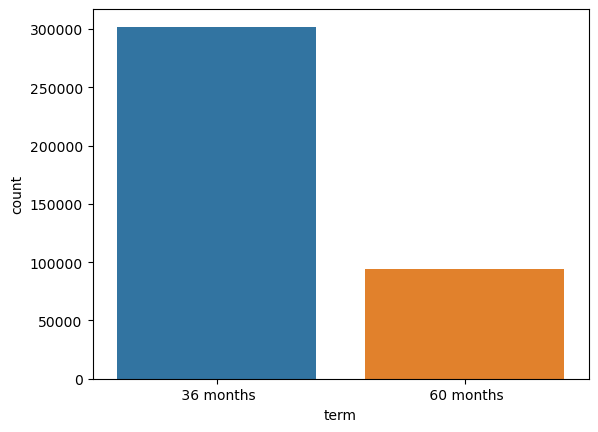

In [26]:
sns.countplot(data =df, x = 'term',hue = 'loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

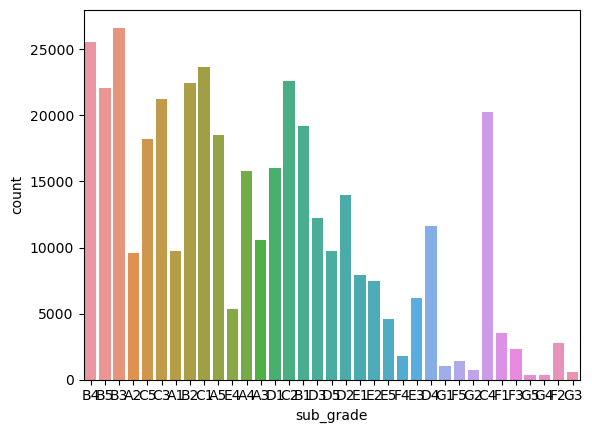

In [27]:
sns.countplot(data= df,  x = 'sub_grade')

In [31]:
cat.columns[:3]

Index(['term', 'grade', 'sub_grade'], dtype='object')

In [31]:
for var,col in enumerate(cat.columns[:6]):
    if df[col].nunique() > 100:
        pass
    else:
        print(var,col)

0 term
1 grade
2 sub_grade
4 emp_length
5 home_ownership


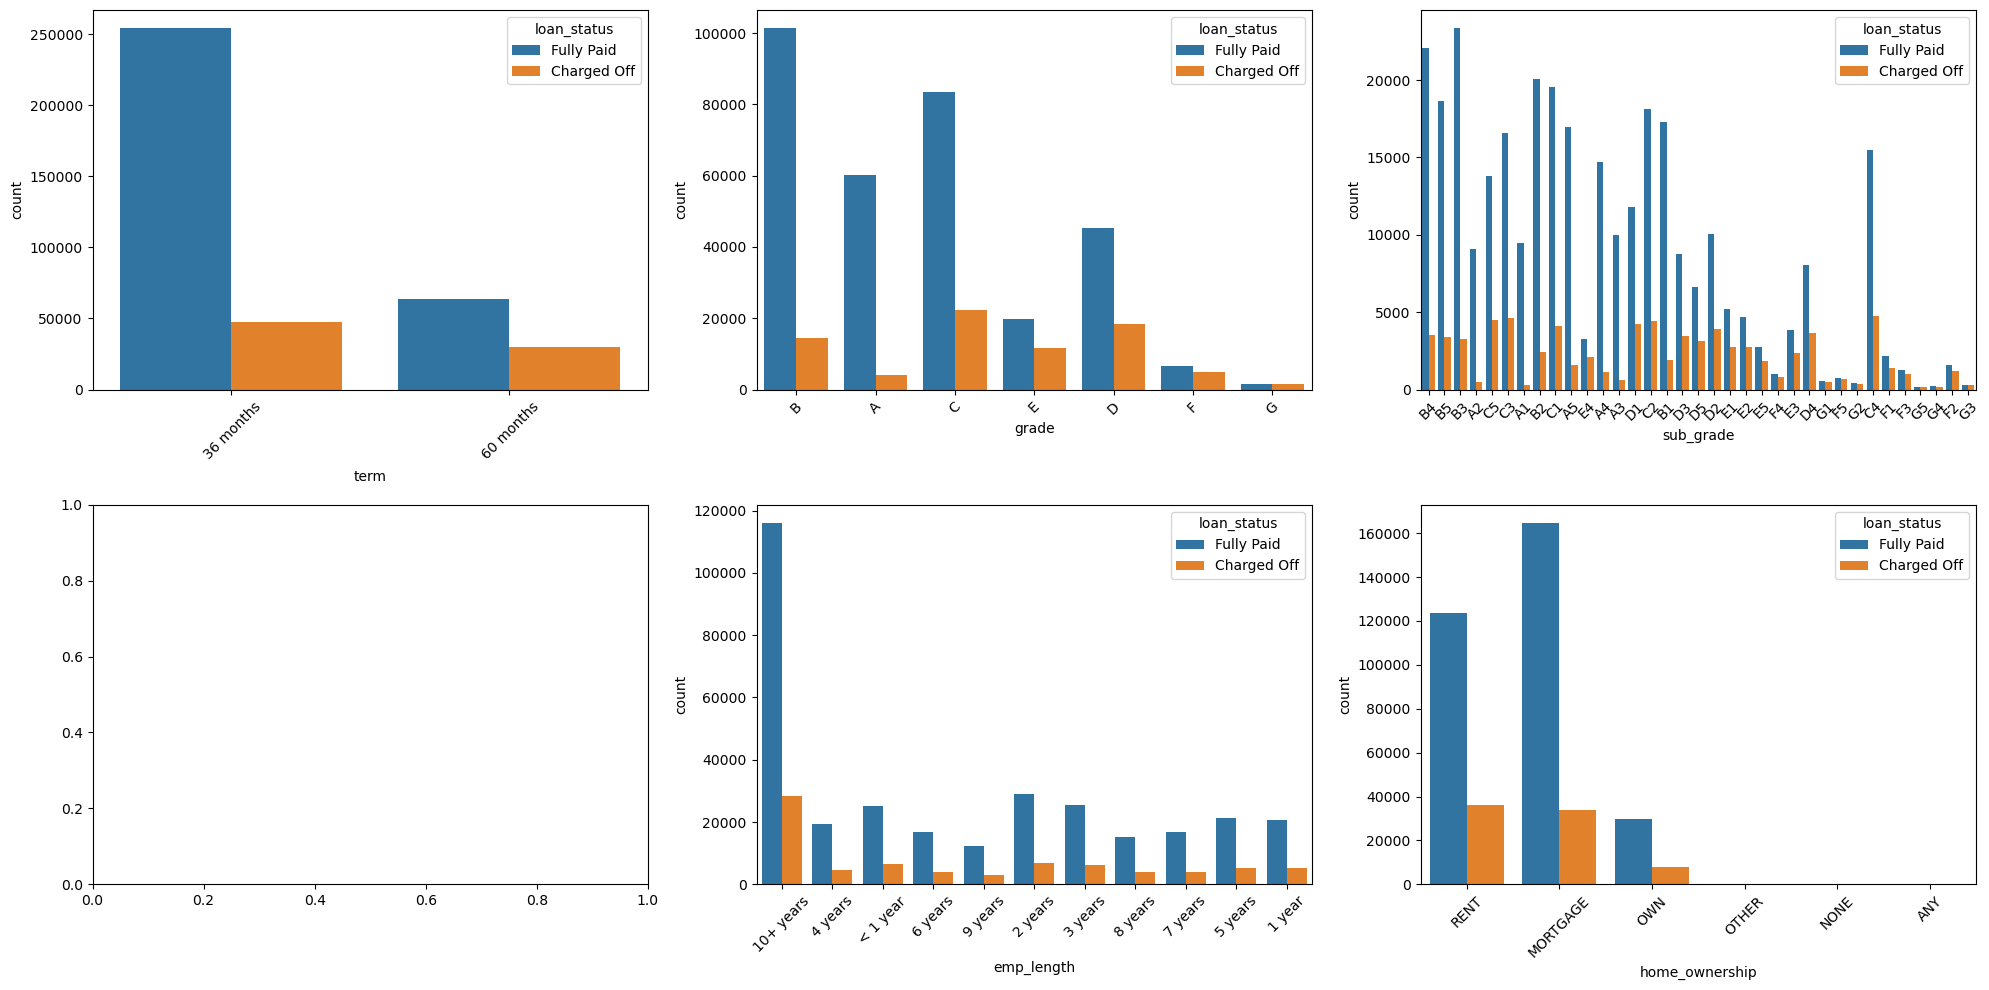

In [57]:
fig,axs = plt.subplots(nrows = 2,ncols =3,figsize = (20,10))

axs = axs.flatten()

for var,col in enumerate(cat.columns[:6]):
    if df[col].nunique() > 100:
        pass
    else:
        sns.countplot(data = df, x = col, hue = 'loan_status',ax = axs[var])
        axs[var].tick_params(axis='x', rotation=45)
        plt.tight_layout()
   

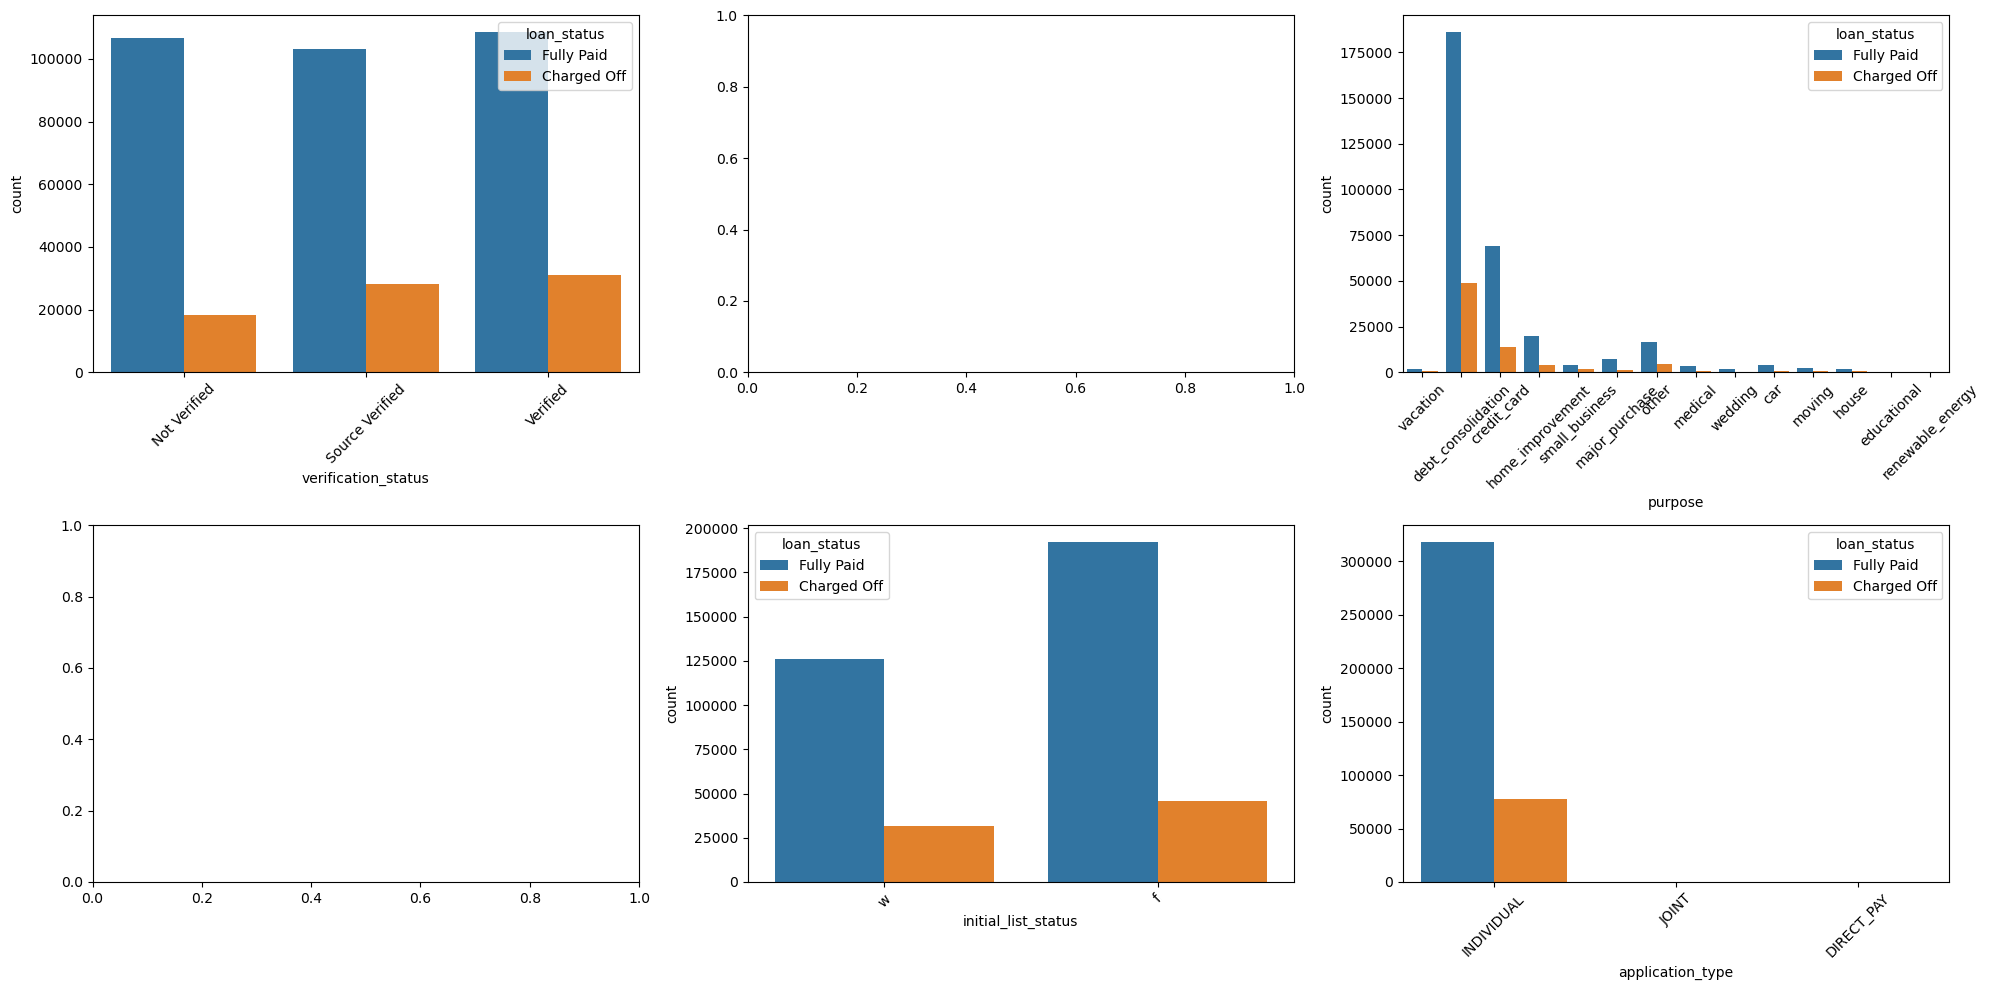

In [59]:
fig,axs = plt.subplots(nrows = 2,ncols =3,figsize = (20,10))

axs = axs.flatten()

for var,col in enumerate(cat.columns[6:]):
    if (df[col].nunique() > 100) | (col == 'loan_status') :
        pass
    else:
        sns.countplot(data = df, x = col, hue = 'loan_status',ax = axs[var])
        axs[var].tick_params(axis='x', rotation=45)
        plt.tight_layout()
   

In [ ]:
filtered_df = df[df['mort_acc'].isnull()]
selected_columns = filtered_df[['mort_acc','total_acc', 'open_acc','loan_status']]

In [ ]:
len(df[df['mort_acc'].isnull()])

In [ ]:
percentage = pd.DataFrame(round(df['term'].value_counts()/len(df) * 100,2))


In [ ]:
pd.concat([pd.DataFrame(df['term'].value_counts()),percentage],axis = 1)

In [ ]:
import pandas as pd

# Calculate the percentage of each unique value in the 'term' column and store it in a DataFrame
percentage = pd.DataFrame(round(df['term'].value_counts() / len(df) * 100, 2), columns=['percentage'])


In [ ]:
mort_acc_condition_value_counts_percentage

In [ ]:
all_categorical_df

In [ ]:
pd.concat()

In [ ]:
for i in df[df['mort_acc'].isnull()]['loan_status'].unique():
    total_count = len(df[(df['mort_acc'].isnull()) & (df['loan_status'] == i)])
    total_percentage = (total_count / len(df[df['mort_acc'].isnull()]['loan_status'])) * 100
    
    print('total number: ', total_count)
    print('total percentage: ', total_percentage)
    print('---------------')


In [ ]:
for i in df[df['pub_rec_bankruptcies'].isnull()]['loan_status'].unique():
    total_count = len(df[(df['pub_rec_bankruptcies'].isnull()) & (df['loan_status'] == i)])
    total_percentage = (total_count / len(df[df['pub_rec_bankruptcies'].isnull()]['loan_status'])) * 100
    
    print('total number: ', total_count)
    print('total percentage: ', total_percentage)
    print('---------------')


In [ ]:
for i in df[df['title'].isnull()]['loan_status'].unique():
    total_count = len(df[(df['title'].isnull()) & (df['loan_status'] == i)])
    total_percentage = (total_count / len(df[df['title'].isnull()]['loan_status'])) * 100
    
    print('total number: ', total_count)
    print('total percentage: ', total_percentage)
    print('---------------')


In [ ]:
for i in df[df['pub_rec_bankruptcies'].isnull()]['loan_status'].unique():
    total_count = len(df[(df['pub_rec_bankruptcies'].isnull()) & (df['loan_status'] == i)])
    total_percentage = (total_count / len(df[df['pub_rec_bankruptcies'].isnull()]['loan_status'])) * 100
    
    print('total number: ', total_count)
    print('total percentage: ', total_percentage)
    print('---------------')


In [ ]:
for i in df[df['emp_title'].isnull()]['loan_status'].unique():
    total_count = len(df[(df['emp_title'].isnull()) & (df['loan_status'] == i)])
    total_percentage = (total_count / len(df[df['emp_title'].isnull()]['loan_status'])) * 100
    
    print('total number: ', total_count)
    print('total percentage: ', total_percentage)
    print('---------------')


In [ ]:
for i in df[df['emp_length'].isnull()]['loan_status'].unique():
    total_count = len(df[(df['emp_length'].isnull()) & (df['loan_status'] == i)])
    total_percentage = (total_count / len(df[df['emp_length'].isnull()]['loan_status'])) * 100
    
    print('total number: ', total_count)
    print('total percentage: ', total_percentage)
    print('---------------')


In [ ]:
df[df['loan_status'].eq('Charged Off')]

In [ ]:
df[df['loan_status'].eq('Charged Off')]['term'].value_counts()

In [ ]:
df['term'].value_counts()

In [ ]:
for val in df.term.unique():
    print(f"total number of {val} term  in dataset is =  {len(df[df['term'].eq(val)])}")
    print(f"total percent of {val} in dataset is = {len(df[df['term'].eq(val)])/len(df) * 100:.2f}")
    print('----------------------')

In [ ]:
for val in df[df['loan_status'].eq('Charged Off')]['term'].unique():
    total_count = (df['term'].eq(val) & df['loan_status'].eq('Charged Off')).sum()
    total_percentage = (total_count / len(df[df['loan_status'].eq('Charged Off')])) * 100
    
    print(f"Total number of {val} term in dataset is = {total_count}")
    print(f"Total percentage of {val} in dataset is = {total_percentage:.2f}%")
    print('----------------------')


In [ ]:
sns.countplot(data = df,x = 'term',hue = 'loan_status')

###  we can see clearly that people with an extended loan repayment tend s to default more

In [ ]:
sns.countplot(data =df, x = 'grade',hue = 'loan_status')

In [ ]:
plt.figure(figsize = (40,10))
sns.countplot(data =df, x = 'sub_grade',hue = 'loan_status')

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(data = df,x = 'purpose',hue = 'loan_status')

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(data = df,x = 'verification_status',hue = 'loan_status')

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(data = df,x = 'application_type',hue = 'loan_status')

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(data = df,x = 'initial_list_status',hue = 'loan_status')

In [ ]:
def countplot(data,column):
    plt.figure(figsize = (15,5))
    sns.countplot(data = data,x = column)
    plt.plot()
    plt.xlabellllllllll

In [ ]:
df.select_dtypes('object')

In [ ]:
fig,axs = plt.subplots(nrows = 4,ncols =3,figsize = (25,10))

axs = axs.flatten()


for var,col in enumerate(df.select_dtypes(np.number).columns):
    sns.histplot(data = df, x = col ,ax = axs[var])
    plt.tight_layout()
   

In [ ]:
df.initial_list_status.unique()

In [ ]:
unique_values_dict = {}
for i in df.columns:
    unique_values = list(pd.Series(df[i].unique()))
    uv = unique_values[:5]
    #lis1.append(unique_values[:5])
    unique_values_dict[i] = uv
    

In [ ]:
data_type = pd.DataFrame(df.dtypes)


In [ ]:
data_type['uniq_va'] = data_type.index.map(unique_values_dict)

In [ ]:
data_type

### issue_d,earliest_cr_line, has incorrect datat types

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [ ]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [ ]:
df.info()

### Missing and Duplicates value_check

In [ ]:
mv = pd.DataFrame({'total_mv':df.isnull().sum(), 'percentage_missing':df.isnull().sum()/len(df) * 100})
mv.sort_values(by = 'percentage_missing',ascending = False,inplace = True)
mv.head(10)                

In [ ]:
mv.index[:5]

In [ ]:
data_type.loc[['mort_acc', 'emp_title', 'emp_length', 'title', 'pub_rec_bankruptcies']]